<a href="https://colab.research.google.com/github/syibrahima31/Project-with-torch/blob/main/MNIST_classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget www.di.ens.fr/~lelarge/MNIST.tar.gz
!tar -zxvf MNIST.tar.gz

--2021-03-20 12:58:02--  http://www.di.ens.fr/~lelarge/MNIST.tar.gz
Resolving www.di.ens.fr (www.di.ens.fr)... 129.199.99.14
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.di.ens.fr/~lelarge/MNIST.tar.gz [following]
--2021-03-20 12:58:03--  https://www.di.ens.fr/~lelarge/MNIST.tar.gz
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-gzip]
Saving to: ‘MNIST.tar.gz’

MNIST.tar.gz            [             <=>    ]  33.20M  11.6MB/s    in 2.9s    

2021-03-20 12:58:06 (11.6 MB/s) - ‘MNIST.tar.gz’ saved [34813078]

MNIST/
MNIST/raw/
MNIST/raw/train-labels-idx1-ubyte
MNIST/raw/t10k-labels-idx1-ubyte.gz
MNIST/raw/t10k-labels-idx1-ubyte
MNIST/raw/t10k-images-idx3-ubyte.gz
MNIST/raw/train-images-idx3-ubyte
MNIST/raw/train-labels-idx1-ubyte.gz
MNIST/raw/t10k-images-idx3-ubyte
MNIST/raw/tra

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
import torch 
import torchvision
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms import transforms
from torchvision.datasets import MNIST
from torch import nn
from torch import optim

## PREPARE DATASET 

In [4]:
mnist_trainset = MNIST(root='./', train=True, download=True, transform=transforms.ToTensor())
mnist_testset = MNIST(root='./', train=False, download=True, transform=transforms.ToTensor())

# USE DATALOADER FOR TRAINING 
BATCH_SIZE = 100

train_loader = DataLoader(dataset=mnist_trainset, batch_size=BATCH_SIZE, shuffle=True )
test_loader = DataLoader(dataset=mnist_testset, batch_size=BATCH_SIZE, shuffle=True )

## HYPERPARAMETRE

In [5]:
n_iterations= len(train_loader)
n_epochs  = 10
learning_rate = 0.01

In [6]:
iterator = iter(train_loader)
images, labels = next(iterator)

In [7]:
images.shape 

torch.Size([100, 1, 28, 28])

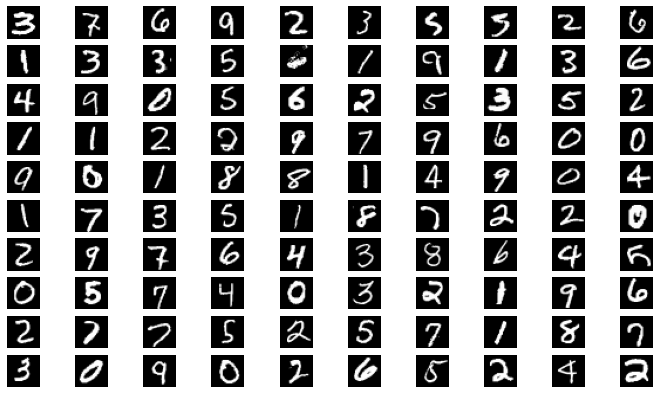

In [9]:
plt.figure(figsize=(12,7))
for i, image in enumerate(images):
  plt.subplot(10,10,i+1)
  plt.imshow(image.reshape(28,28), cmap="gray")
  plt.axis("off")

## CREATE MODEL  

In [10]:
class NeuralNetwork(nn.Module):
  def __init__(self, in_features, out_features):
    super(NeuralNetwork, self).__init__()
    self.layer_1 = nn.Linear(in_features, 100)
    self.relu_1 = nn.ReLU()
    self.layer_2 = nn.Linear(100,100)
    self.relu_2  = nn.ReLU()
    self.layer_3 = nn.Linear(100, out_features)



  def forward(self, x):
    x = self.layer_1(x)
    x = self.relu_1(x)
    x = self.layer_2(x)
    x = self.relu_2(x)
    x = self.layer_3(x)
    return x    


In [11]:
model = NeuralNetwork(784,10)

## DEFINE LOSS FUNCTION AND OPTIMIZER 

In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

## TRAINING LOOP 

In [22]:
for epoch in range(n_epochs) :
  for i, (data, labels) in enumerate(train_loader):
    data = data.reshape(-1, 28*28)

    # forward pass 
    pred = model(data)

    # loss 
    loss = criterion(pred, labels)

    # compute gradients 
    loss.backward()

    # update weights 
    optimizer.step()

    #zero gradient 
    optimizer.zero_grad()
    if i / 10 == 0:
      print(f"epoch:{epoch}/{n_epochs} step:{i+1}/{n_iterations}, loss:{loss.item():.5f}")

epoch:0/10 step:1/600, loss:0.00058
epoch:1/10 step:1/600, loss:0.02944
epoch:2/10 step:1/600, loss:0.00076
epoch:3/10 step:1/600, loss:0.00000
epoch:4/10 step:1/600, loss:0.00215
epoch:5/10 step:1/600, loss:0.01634
epoch:6/10 step:1/600, loss:0.09389
epoch:7/10 step:1/600, loss:0.00058
epoch:8/10 step:1/600, loss:0.02877
epoch:9/10 step:1/600, loss:0.01606


## TEST THE MODEL 

In [47]:
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images , labels  in test_loader:
    images = images.reshape(-1, 28*28)
    output = model(images)
    _,pred_classes = torch.max(output, 1)
    n_samples +=images.shape[0]
    n_correct += (pred_classes==labels).sum()

  acc = (n_correct / n_samples) * 100
  print(f"accuracy test set {acc.item():.3f}")  


accuracy test set 97.490
